<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Descriptive statistics and visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

Here a description of the column in the dataset: 

- `CRIM` - per capita crime rate by town
- `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` - proportion of non-retail business acres per town.
- `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX` - nitric oxides concentration (parts per 10 million)
- `RM` - average number of rooms per dwelling
- `AGE` - proportion of owner-occupied units built prior to 1940
- `DIS` - weighted distances to five Boston employment centres
- `RAD` - index of accessibility to radial highways
- `TAX` - full-value property-tax rate per $10,000
- `PTRATIO` - pupil-teacher ratio by town
- `LSTAT` - % lower status of the population
- `MEDV` - Median value of owner-occupied homes in 1000's

### Median value of owner occupied homes - Box plot

In [6]:
boston_df = boston_df.loc[:, 'CRIM':'MEDV'] # dropping the first column - unnecessary

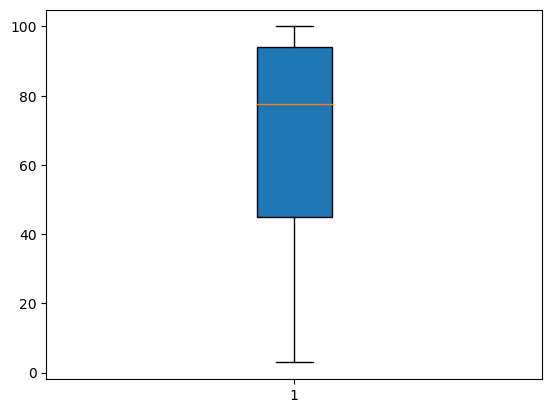

In [57]:
pyplot.boxplot([boston_df['AGE']], patch_artist = True)
pyplot.show()

### Charles River - Barplot

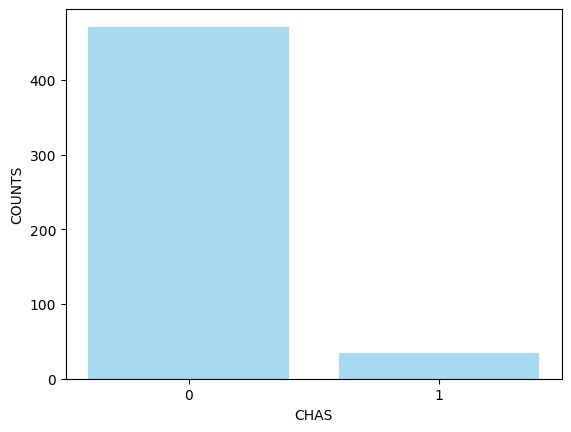

In [97]:
category_counts = boston_df['CHAS'].value_counts()

pyplot.bar(
    category_counts.index,
    category_counts.values,
    color = 'skyblue',
    alpha = .75
)

pyplot.xlabel('CHAS')
pyplot.ylabel('COUNTS')
pyplot.xticks(
    ticks=range(len(category_counts)),
    labels=['0', '1']
)
pyplot.show()

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

### MEDV v. AGE - Boxplot

In [98]:
boston_df['AGE_BINNED'] = pd.cut(
    boston_df['AGE'],
    bins = [0, 35, 70, float('inf')],
    labels = ['0-35', '35-70', '70+']
)

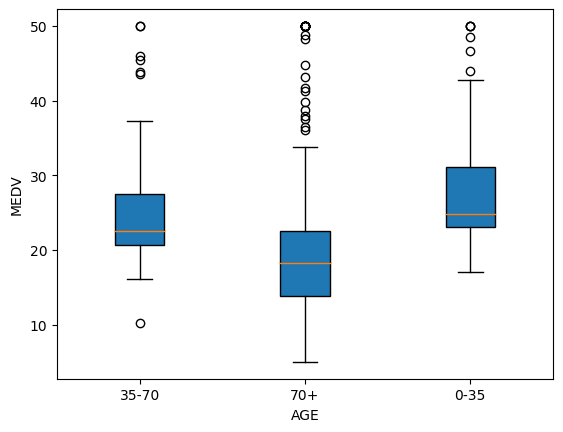

In [99]:
categories = boston_df['AGE_BINNED'].unique()

data_to_plot = [boston_df[boston_df['AGE_BINNED'] == category]['MEDV'] for category in categories]

pyplot.boxplot(
    data_to_plot,
    labels = categories,
    patch_artist = True
)
pyplot.xlabel('AGE')
pyplot.ylabel('MEDV')
pyplot.show()

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

### Nitric Oxide v. Non-retail business per acres - Scatter plot

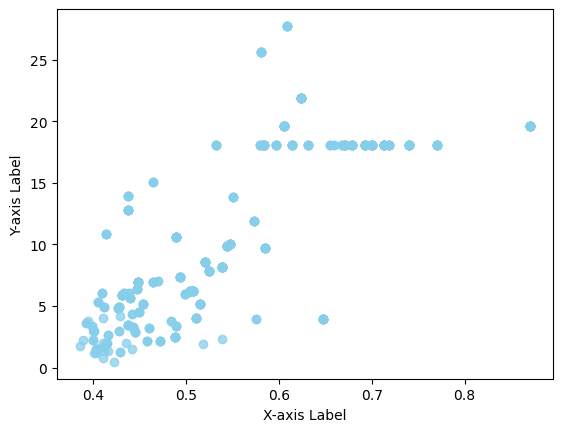

In [100]:
pyplot.scatter(
    boston_df['NOX'],
    boston_df['INDUS'],
    color = 'skyblue',
    alpha = .75,
    marker = 'o'
)
pyplot.xlabel('X-axis Label')
pyplot.ylabel('Y-axis Label')
pyplot.show()

- Create a histogram for the pupil to teacher ratio variable

### Pupil-to-teacher ratio - Histogram

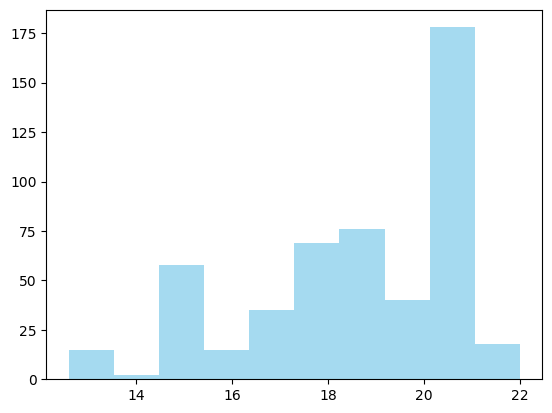

In [95]:
pyplot.hist(
    boston_df['PTRATIO'],
    color = 'skyblue',
    alpha = .75
)
pyplot.show()

## Task 3 - Use the appropriate tests to answer the questions provided

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Let $\mu_X$ denote the average value of houses in close proximity to the Charles river and let $\mu_Y$ be the average value of houses not in close proximity to the Charlers river. My belief is that estates in proximity to the river should be (on average) worth more than those that are not. Hence, the two hypotheses for our test are:

- $H_0$: $\mu_X = \mu_Y$.
- $H_1$: $\mu_X > \mu_Y$.

Before performing the t-Test, checking for equality of variances of the two samples is needed. To this end, we can perform the Levene's Test:

In [110]:
scipy.stats.levene(
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    center = 'mean'
).pvalue

0.003238119367639829

The Levene's test p-value is smaller than $\alpha=0.05$; hence, we reject $H_0$ and conclude that there is a significant difference in variances across the groups. 

We can now proceed to perform a two-sample t-test with unequal variance.

In [135]:
scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    equal_var = False
)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Given that the p-value 0.00356 is less than the 0.05 significance level, we fail to reject the null hypothesis and conclude that there is no enough statistical evidence to support our assumption that estates in close proximity to the river are more valuable than the others.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

As we did above, the first step is to test for equality of variance via the Levene's test:

In [147]:
zero_thirtyfive_medv = boston_df[boston_df['AGE_BINNED'] == '0-35']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['AGE_BINNED'] == '35-70']['MEDV']
seventy_plus_medv = boston_df[boston_df['AGE_BINNED'] == '70+']['MEDV']

In [148]:
scipy.stats.levene(
    zero_thirtyfive_medv,
    thirtyfive_seventy_medv,
    seventy_plus_medv,
    center = 'mean'
).pvalue

0.06295337343259205

Given the results of such test, we fail to reject $H_0$ and conclude that there is no statistical significance in the groups' variances.

We can now perform an ANOVA test, which hypotheses are: 

- $H_0$: $\mu_{\text{0-35}} = \mu_{\text{35-70}} = \mu_{\text{70+}}$.
- $H_1$: At least one of the group mean is different from the other group means.

In [157]:
f_statistic, p_value = \
    scipy.stats.f_oneway(
        zero_thirtyfive_medv,
        thirtyfive_seventy_medv,
        seventy_plus_medv        
    )
p_value

1.7105011022702984e-15

Since the p-value (1.7e-15) is much smaller than the significance level of 0.05, we reject $H_0$ and conclude that there is a significant difference in means across the groups

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

To investigate whether there is or there is not relationship between Nitric oxide concentrations and proportion of non-retail business acres per town, we can carry out the Pearson correlation test. Here are the hypotheses:

- $H_0$: $r = 0 \rightarrow$ There is no linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
- $H_1$: $r ≠ 0 \rightarrow$ There is a linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [161]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])

PearsonRResult(statistic=-0.4273207723732828, pvalue=7.065041586253293e-24)

Given the entity of the p-value (7.06), we fail to reject $H_0$ and conclude that there is no linear relationship between the two variables.